# Customized Data Visualizations

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv("recent-grads.csv")
print(recent_grads.shape[0])
recent_grads_na = recent_grads.dropna()
print(recent_grads_na.shape[0])


173
172


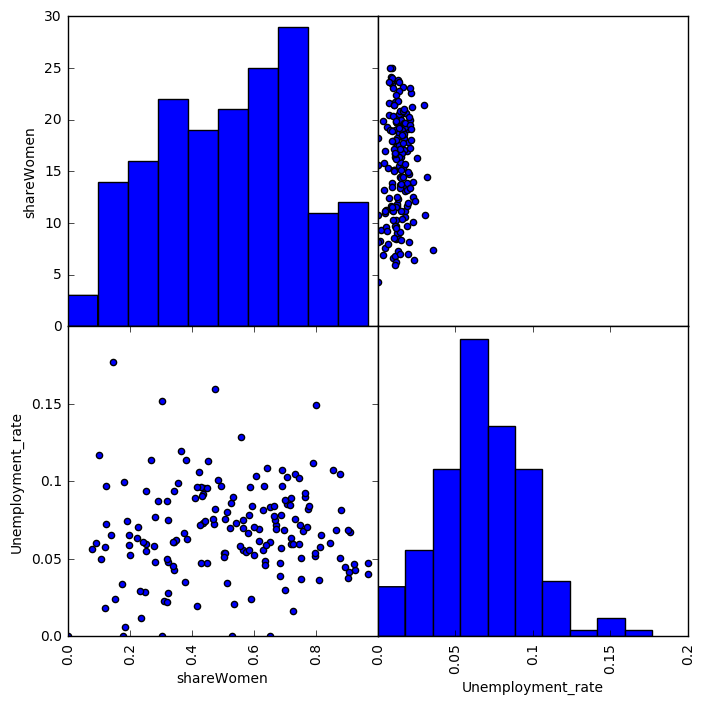

In [32]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(recent_grads_na["ShareWomen"])
ax2.scatter(recent_grads_na["Unemployment_rate"], recent_grads_na["ShareWomen"])
ax3.scatter(recent_grads_na["ShareWomen"], recent_grads_na["Unemployment_rate"])
ax4.hist(recent_grads_na["Unemployment_rate"])

ax1.xaxis.set_visible(False)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax4.yaxis.set_visible(False)

ax1.set_ylabel("shareWomen")
ax3.set_xlabel("shareWomen")
ax3.set_ylabel("Unemployment_rate")
ax4.set_xlabel("Unemployment_rate")

fig.subplots_adjust(wspace = 0, hspace = 0)

ax1.set(ylim=(0,30))
ax2.set(xlim=(0,1.0))
ax3.set(xlim=(0,1.0), ylim=(0,0.2))
ax4.set(xlim=(0,0.2))

ax1.set_yticklabels([0, 5, 10, 15, 20, 25, 30])
ax3.set_yticklabels([0.00, 0.05, 0.10, 0.15])
ax3.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8], rotation=90)
ax4.set_xticklabels([0.00, 0.05, 0.10, 0.15, 0.20], rotation=90)

plt.show()

# Bar Chart

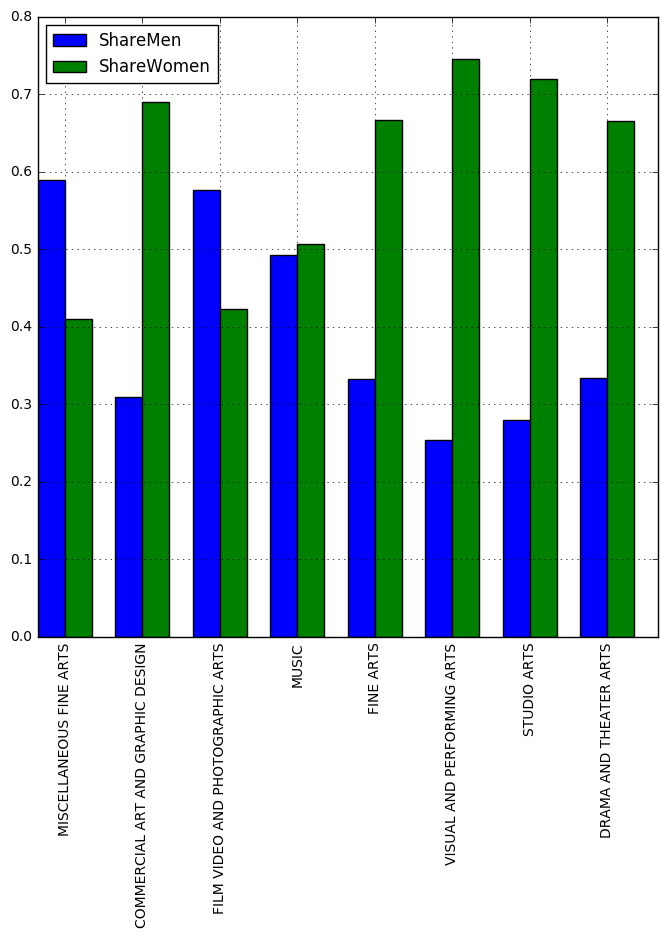

In [33]:
recent_grads["ShareMen"] = recent_grads["Men"] / recent_grads["Total"]
art = recent_grads[recent_grads["Major_category"]=="Arts"]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

import numpy as np
locs = np.arange(len(art))
offset_locs = locs + 0.35
bar_1 = ax.bar(left = locs, height = art["ShareMen"].tolist(), width = 0.35)
bar_2 = ax.bar(left = offset_locs, height = art["ShareWomen"].tolist(), width = 0.35, color = "green")
ax.set_xticklabels(art["Major"].tolist(), rotation = 90)
ax.set_xticks(offset_locs)

plt.legend((bar_1, bar_2), ("ShareMen", "ShareWomen"), loc="upper left")
plt.grid()


This plot shows that within the 'Arts' there is generally a higher proportion of female students. 

In [34]:
print(recent_grads.columns)
recent_grads

Index([u'Rank', u'Major_code', u'Major', u'Total', u'Men', u'Women',
       u'Major_category', u'ShareWomen', u'Sample_size', u'Employed',
       u'Full_time', u'Part_time', u'Full_time_year_round', u'Unemployed',
       u'Unemployment_rate', u'Median', u'P25th', u'P75th', u'College_jobs',
       u'Non_college_jobs', u'Low_wage_jobs', u'ShareMen'],
      dtype='object')


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,ShareMen
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,1207,37,0.018381,110000,95000,125000,1534,364,193,0.879436
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,388,85,0.117241,75000,55000,90000,350,257,50,0.898148
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,340,16,0.024096,73000,50000,105000,456,176,0,0.846963
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,692,40,0.050125,70000,43000,80000,529,102,0,0.892687
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,16697,1672,0.061098,65000,50000,75000,18314,4440,972,0.658369
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,1449,400,0.177226,65000,50000,102000,1142,657,244,0.855033
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,2482,308,0.095652,62000,53000,72000,1768,314,259,0.558644
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,827,33,0.021167,62000,31500,109000,972,500,220,0.464286
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,54639,4650,0.057342,60000,48000,70000,52844,16384,3253,0.880441
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,41413,3895,0.059174,60000,45000,72000,45829,10874,3170,0.803550


# Seaborn

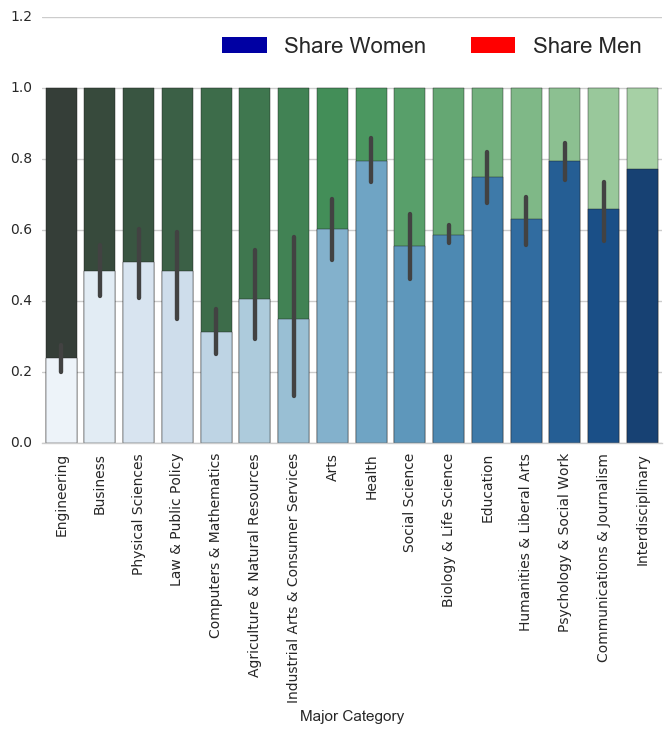

In [51]:
import seaborn as sns
#Create barplot by Major Category
recent_grads['ShareTotal'] = recent_grads['ShareWomen'] + recent_grads['ShareMen']
sns.set(style="whitegrid", color_codes=True)

sns.barplot(x = 'Major_category', y = 'ShareTotal', data = recent_grads, palette = 'Greens_d')
plot = sns.barplot(x = 'Major_category', y = 'ShareWomen', data = recent_grads, palette = 'Blues')
topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Share Women', 'Share Men'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)
plt.xticks(rotation = 90)
#Formatting
sns.despine(left=True)
plot.set_ylabel("")
plot.set_xlabel("Major Category")

sns.plt.show()


Seaborn stacked chart showing Major Category and the breakdown of male vs female attendants. 